# Imports

In [1]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import uproot
import pickle
import pandas as pd
import numpy as np
import math
%matplotlib inline

# Load Data:

In [2]:
eventsWithReg_EB = pd.read_pickle("run3_1to11.pkl")

In [3]:
xtest = pd.read_pickle("xtest_run3_1to11.pkl")
ytest = pd.read_pickle("ytest_run3_1to11.pkl")
events_test = pd.read_pickle("events_test_run3_1to11.pkl")
tgtvar = (1/np.array(ytest))*(events_test['ecal'] + events_test['hcal'])

In [31]:
a=0
for i in range(len(events_test)):
    if events_test['true'].iloc[i] > 100:
        print(events_test['true'].iloc[i])
        print(i)
        a+=1
print(a , ' is a')

125.665474
1
104.95693
2
196.43878
3
188.76163
5
168.29811
6
126.401695
8
198.95348
13
132.67296
14
112.52064
15
150.20995
16
188.51009
19
106.683754
21
141.13599
23
140.42703
24
120.69922
25
179.21889
26
109.02632
27
141.32602
28
114.17111
30
152.06116
31
134.1231
35
176.97583
37
125.75836
40
146.20724
44
124.21754
45
109.09121
46
174.69441
47
171.5467
49
162.5831
50
186.38185
51
140.42809
52
148.24355
54
194.10568
56
162.85338
57
161.2027
59
145.97922
60
154.75508
63
110.50352
64
104.34294
65
191.65529
66
159.36353
67
193.81464
68
197.81067
70
197.16562
72
167.30365
73
113.18653
74
163.54483
77
148.49037
79
169.02995
80
103.5381
81
147.03796
84
155.71022
86
182.10391
88
181.98769
89
151.04124
90
107.970146
92
165.66533
93
118.752785
96
113.92202
97
105.97644
98
154.77197
101
199.89954
102
157.64879
104
184.67259
108
182.03163
109
107.5029
111
147.86624
113
159.5129
115
120.379555
116
154.27617
117
111.41733
121
190.14691
123
155.5925
128
138.93254
134
107.97415
135
196.33818
137
166.

131.52925
4308
100.876976
4312
152.34024
4314
109.55296
4321
131.09644
4324
159.75499
4326
116.46915
4327
152.32527
4328
100.09109
4330
156.95445
4331
115.08258
4332
119.149734
4337
145.66826
4338
155.47432
4339
121.16836
4341
124.49729
4342
197.26506
4343
124.65451
4344
100.79245
4345
105.71955
4346
189.17651
4347
186.59094
4348
143.90512
4350
106.09643
4353
114.95007
4354
124.26392
4355
172.02122
4358
183.57715
4359
105.209404
4361
103.565636
4362
142.4925
4363
105.22714
4364
163.54279
4370
187.63333
4374
131.46602
4376
189.2966
4381
100.29367
4383
183.67561
4385
162.71007
4386
122.13045
4388
106.35442
4389
179.20308
4394
177.56166
4396
119.992294
4397
121.76137
4401
116.520454
4402
137.76819
4405
136.25916
4406
192.8462
4407
191.33197
4413
176.58203
4414
169.38504
4415
111.17175
4417
153.06932
4419
156.55193
4425
191.95097
4428
161.01955
4429
100.33607
4430
112.66364
4431
105.4616
4432
132.42279
4433
160.29889
4436
146.37675
4438
124.91446
4439
115.975914
4440
154.64325
4441
158.042

166.33353
9255
176.14594
9257
165.22287
9258
143.55338
9265
154.9941
9266
184.22705
9267
151.7153
9269
190.70284
9271
175.60564
9272
199.01132
9273
106.70824
9275
157.18835
9277
109.027145
9279
112.69779
9281
135.28018
9283
146.64594
9285
173.17073
9286
189.76694
9288
151.86482
9289
185.04099
9291
161.88347
9293
143.51596
9294
152.91608
9295
124.816124
9296
150.2677
9300
120.51871
9301
133.37074
9302
167.08943
9304
147.97305
9306
126.37936
9308
140.45804
9314
140.49437
9317
188.42682
9320
110.57459
9321
180.82454
9322
186.61627
9323
107.96193
9324
146.62473
9325
135.46426
9326
126.617226
9329
192.3341
9330
113.726006
9331
105.27443
9332
176.74313
9333
128.16644
9334
181.71031
9336
139.36946
9341
112.0679
9343
199.4456
9344
133.21207
9345
149.85242
9346
181.6748
9347
140.2751
9348
193.72215
9354
144.09695
9355
160.4271
9359
191.67278
9360
152.91003
9361
142.41328
9364
126.15308
9366
154.11894
9371
149.05205
9372
184.09685
9373
175.16928
9374
172.5014
9377
199.06458
9378
165.85374
9379
1

# Definitions:

In [4]:
Erange_0_10_1000_int = [0,10,1000]
def Erange_0_10_1000(n):
    if n == 0:
        lowE = 0
        highE = 10
    if n == 1:
        lowE = 10
        highE = 1000
    
    return lowE, highE   

In [41]:
Erange_0_10_50_100_200_int = [0,10,50,100,200]
def Erange_0_10_50_100_200(n):
    if n == 0:
        lowE = 0
        highE = 10
    if n == 1:
        lowE = 10
        highE = 50
    if n == 2:
        lowE = 50
        highE = 100
    if n == 3:
        lowE = 100
        highE = 200
    
    return lowE, highE  

# Loading models and making predicitons:

In [6]:
XGBR = pickle.load(open('XGBR_model_run3_1to11.sav', 'rb'))
ETR = pickle.load(open('ETR_model_run3_1to11.sav', 'rb'))

#NSVR = pickle.load(open('NSVR_model_FULL_PT1.sav', 'rb'))
#SVR = pickle.load(open('SVR_model_FULL_PT1.sav', 'rb'))
HGBR = pickle.load(open('HGBR_model_run3_1to11.sav', 'rb'))
ADA = pickle.load(open('ADA_model_run3_1to11.sav', 'rb'))
KNR = pickle.load(open('KNR_model_run3_1to11.sav', 'rb'))
RFR = pickle.load(open('RFR_model_run3_1to11.sav', 'rb'))

# predict(Etrue) = (1/predict(ytest))*eraw, 
# note: ytest = tgtvar = eraw/etrue

In [7]:
ypred_XGBR = ((1/np.array(XGBR.predict(xtest)))*(events_test['ecal']+ events_test['hcal']))[:10000]
ypred_ETR = ((1/np.array(ETR.predict(xtest)))*(events_test['ecal']+ events_test['hcal']))[:10000]
#ypred_NSVR = np.array(NSVR.predict(xtest))
#ypred_SVR = np.array(SVR.predict(xtest))
ypred_HGBR = ((1/np.array(HGBR.predict(xtest)))*(events_test['ecal']+ events_test['hcal']))[:10000]
ypred_ADA = ((1/np.array(ADA.predict(xtest)))*(events_test['ecal']+ events_test['hcal']))[:10000]
ypred_KNR = ((1/np.array(KNR.predict(xtest)))*(events_test['ecal']+ events_test['hcal']))[:10000]
ypred_RFR = ((1/np.array(RFR.predict(xtest)))*(events_test['ecal']+ events_test['hcal']))[:10000]

# Creating Dataframe:

In [8]:
eta = np.array(xtest["eta"])[:10000]
phi = np.array(xtest["phi"])[:10000]
#hcal = np.array(xtest["hcal"])[:10000]
#ecal = np.array(xtest["ecal"])[:10000]
eraw = np.array(events_test['ecal']+events_test['hcal'])[:10000]
etrue = np.array(events_test["true"])[:10000]
ecorr = np.array(events_test['Ccorrecal']+events_test['Ccorrhcal'])[:10000]
genPt = np.array(events_test["p"])[:10000]

In [9]:
tgtvar = tgtvar[:10000]

In [10]:
rawDivGen = np.divide(eraw, etrue)[:10000]
#e91XDivGen = np.divide(e91X,  etrue)[:10000]
xgbrDivGen = np.divide(ypred_XGBR,  tgtvar)[:10000]
etrDivGen = np.divide(ypred_ETR,  tgtvar)[:10000]
#nsvrDivGen = np.divide(ypred_NSVR,  events_test['genEnergy'])[:10000]
corrDivGen = np.divide(ecorr,  etrue)[:10000]
#svrDivGen = np.divide(ypred_SVR,  events_test['genEnergy'])[:10000]
hgbrDivGen = np.divide(ypred_HGBR,  tgtvar)[:10000]
adaDivGen = np.divide(ypred_ADA,  tgtvar)[:10000]
knrDivGen = np.divide(ypred_KNR,  tgtvar)[:10000]
rfrDivGen = np.divide(ypred_RFR,  tgtvar)[:10000]

In [11]:
df = pd.DataFrame({
    #'events':events,
    #genPt':genPt,
    #'genEta':genEta,
    #'clusPt':clusPt,
    'eraw':eraw,
    'ecorr':ecorr,
    #'e91X' :e91X,
    'etrue':etrue,
    'rawDivGen':rawDivGen,
    #'e91XDivGen':e91XDivGen,
    'xgbrDivGen':xgbrDivGen,
    #'nsvrDivGen':nsvrDivGen,
    #'svrDivGen':svrDivGen,
    'hgbrDivGen':hgbrDivGen,
    'adaDivGen':adaDivGen,
    'knrDivGen':knrDivGen,
    'rfrDivGen':rfrDivGen,
    'etrDivGen':etrDivGen,
    'corrDivGen':corrDivGen,
    'genPt':genPt
})
#df[['rawDivGen','xgbrDivGen','hgbrDivGen','adaDivGen','knrDivGen','rfrDivGen','etrDivGen','corrDivGen',]]


# create columns which bins corrE/true for each model

In [12]:
df['binned_corrDivGen'] = pd.cut(df['corrDivGen'], bins = np.arange(.6,1.8,.01))
#df['binned_e91XDivGen'] = pd.cut(df['e91XDivGen'], bins = np.arange(.6,1.8,.01))
#df['binned_nsvrDivGen'] = pd.cut(df['nsvrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_xgbrDivGen'] = pd.cut(df['xgbrDivGen'], bins = np.arange(.6,1.8,.01))
#df['binned_svrDivGen'] = pd.cut(df['svrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_hgbrDivGen'] = pd.cut(df['hgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_adaDivGen'] = pd.cut(df['adaDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_knrDivGen'] = pd.cut(df['knrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_rfrDivGen'] = pd.cut(df['rfrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_etrDivGen'] = pd.cut(df['etrDivGen'], bins = np.arange(.6,1.8,.01))

# create columns which bin according to true energy

In [42]:
div_bins_0_10_1000_int = Erange_0_10_1000_int
div_bins_0_10_1000_int = np.array(div_bins_0_10_1000_int)
df['binned_true_0_10_1000_int'] = pd.cut(df['etrue'], bins = div_bins_0_10_1000_int, labels = ['0','1'])

div_bins_0_10_50_100_200_int = Erange_0_10_50_100_200_int
div_bins_0_10_50_100_200_int = np.array(div_bins_0_10_50_100_200_int)
df['binned_true_0_10_50_100_200_int'] = pd.cut(df['etrue'], bins = div_bins_0_10_50_100_200_int, labels = ['0','1','2','3'])


# separate eTrue bins into separate lists and concatenate those lists into a dictionary "dict_of_genPt_lists":

In [43]:

    
dict_of_genE_lists_2 = []
for i in range(0,10):
    dict_of_genE_lists_2.append(df[df['binned_true_0_10_1000_int'] == str(i)])
    
dict_of_genE_lists_3 = []
for i in range(0,4):
    dict_of_genE_lists_3.append(df[df['binned_true_0_10_50_100_200_int'] == str(i)])
    


# RMSE comparisons:

In [44]:
#e91XDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,etrDivGen)).mean()),4)
corrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,corrDivGen)).mean()),4)
etrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,etrDivGen)).mean()),4)
xgbrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,xgbrDivGen)).mean()),4)
hgbrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,hgbrDivGen)).mean()),4)
#svrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,svrDivGen)).mean()),4)
#nsvrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,nsvrDivGen)).mean()),4)
knrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,knrDivGen)).mean()),4)
adaDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,adaDivGen)).mean()),4)
rfrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,rfrDivGen)).mean()),4)

RMSEs = pd.DataFrame({'name' : [ 'corrDivGen_RMSE', 'etrDivGen_RMSE', 'xgbrDivGen_RMSE', 'hgbrDivGen_RMSE', 'knrDivGen_RMSE','rfrDivGen'], 
                     'RMSEs' : [ corrDivGen_RMSE, etrDivGen_RMSE, xgbrDivGen_RMSE, hgbrDivGen_RMSE, knrDivGen_RMSE,rfrDivGen_RMSE]})

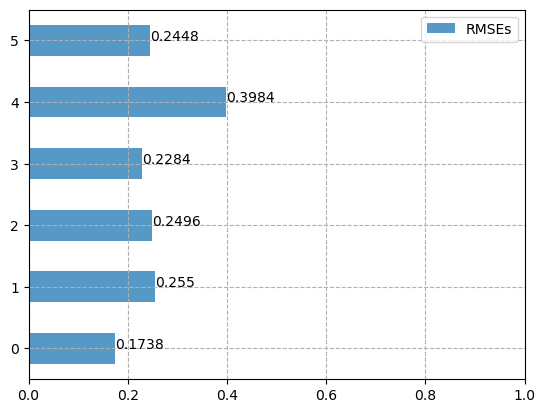

In [45]:

RMSEs.plot( kind='barh',alpha=.75)
plt.xlabel("")
plt.grid('on', ls = '--')
for index, value in enumerate(RMSEs['RMSEs']):
    plt.text(value, index,
             str(RMSEs['RMSEs'][index]))
plt.xlim([0,1])
plt.savefig('RMSEs_tgt.pdf')
plt.show()



# Histograms:

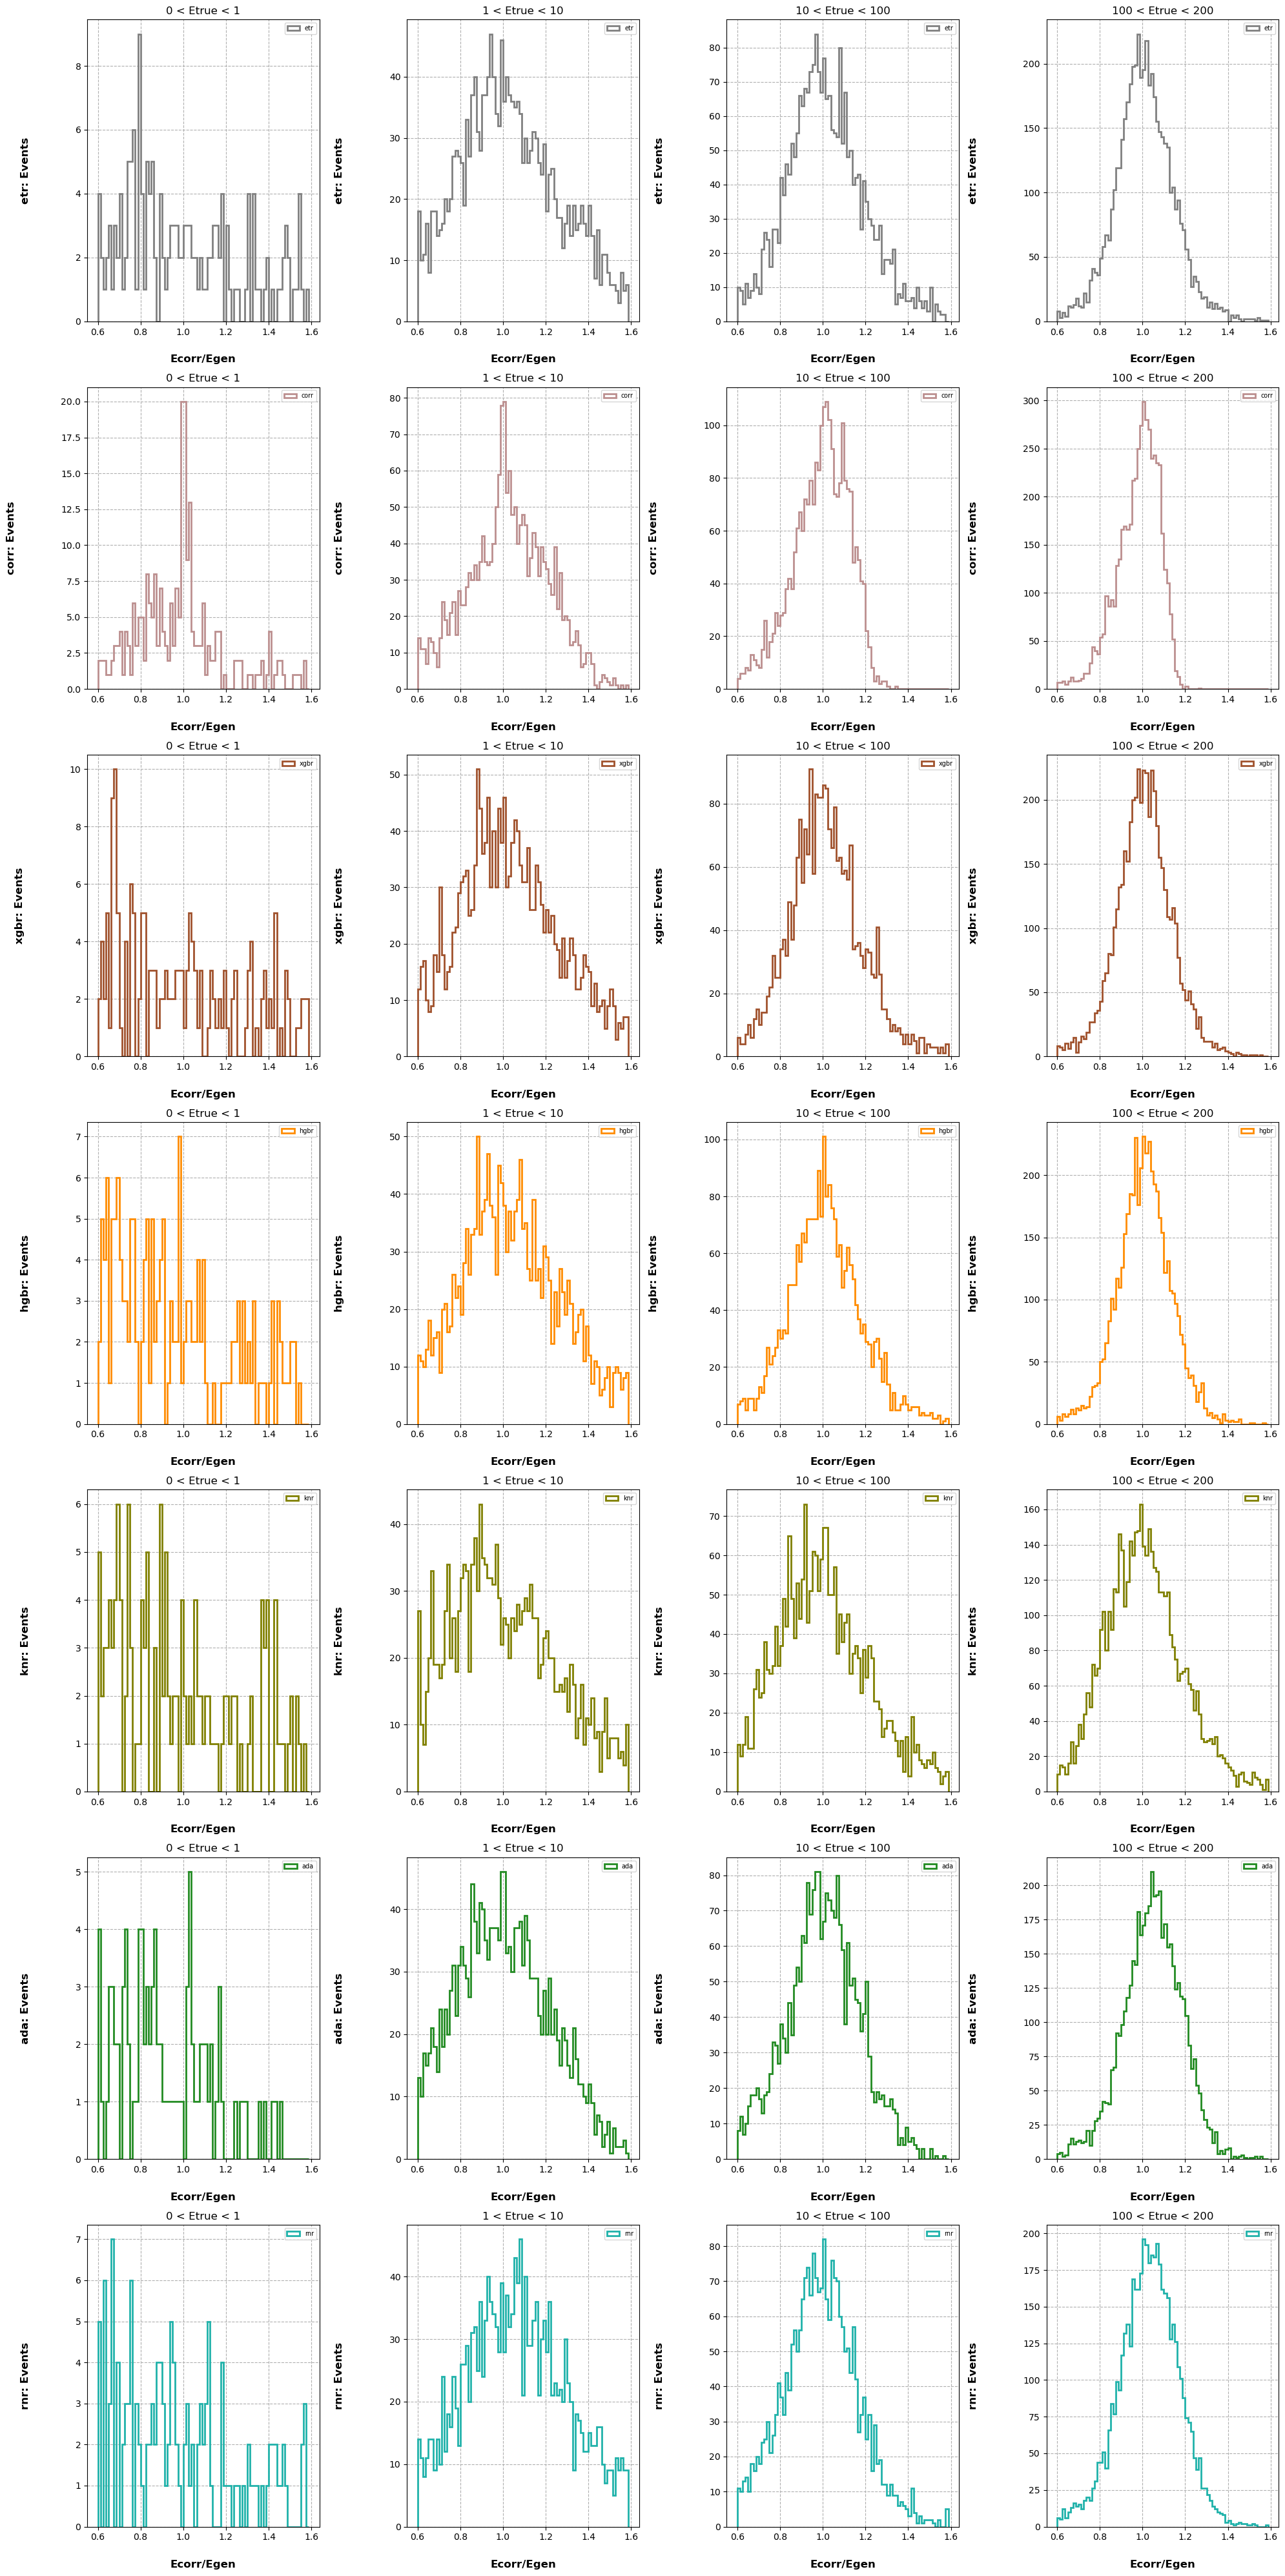

In [46]:
list_of_lists = []

fig, ax4 = plt.subplots(7,4, figsize =(20, 40),sharey=False,tight_layout=True )

for i in range(28):    
    a = i%4
    b = (i - (i%4))/4 
    a = int(a)
    b = int(b)
    
    

    #print(b, " , ", a)
    
    labels = ['etr', 'corr', 'xgbr', 'hgbr', 'knr', 'ada', 'rnr']
    
    
    list_of_lists.append([
        dict_of_genE_lists_3[a]['etrDivGen'],
        #dict_of_genPt_lists_6[a]['e91XDivGen'], 
        dict_of_genE_lists_3[a]['corrDivGen'],
        dict_of_genE_lists_3[a]['xgbrDivGen'],
        dict_of_genE_lists_3[a]['hgbrDivGen'],
        #dict_of_genPt_lists_6[a]['svrDivGen'],
        #dict_of_genPt_lists_6[a]['nsvrDivGen'],
        dict_of_genE_lists_3[a]['knrDivGen'],
        dict_of_genE_lists_3[a]['adaDivGen'],
        dict_of_genE_lists_3[a]['rfrDivGen']
        ])
    
    
            
    
    #print(list_of_lists[i][b])
    
    
    colors = ['gray', 'rosybrown', 'sienna', 'darkorange', 'olive', 'forestgreen', 'lightseagreen', 'teal', 'slateblue', 'palevioletred']
    
    count, bins, ignored = ax4[b,a].hist(list_of_lists[i][b], label = labels[b],color = colors[b], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    
    ax4[b,a].legend(prop={'size':7})
    ax4[b,a].grid('on', ls = '--')
    
    ax4[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax4[b,a].set_ylabel(labels[b] + ": Events", labelpad=50, weight='bold', size=12)
    #if i < 4: 
    ax4[b,a].set_title((str(Erange_0_1_10_100_200(a)[0]) + " < Etrue < " + str(Erange_0_1_10_100_200(a)[1])))
    
    mun, sigma = norm.fit(list_of_lists[i][b])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    #ax4[b,a].plot(bins, mean*.7* (1/((sigma*.5) * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r', ls = '--')

    
    
plt.savefig("hadron_model_comp_rawOtrue.pdf")